In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway
import seaborn as sns
import numpy as np
from statistics import mean

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rcParams['legend.title_fontsize'] = 'x-large' # fontsize of legend title
sns.set_style("white")

def plot_violin(cat1, cat2, title, label1, label2, figname):
    PCE = [cat1, cat2]
    positions = [1, 2]

    # plot data
    fig, ax = plt.subplots()
    violin = ax.violinplot(PCE, positions, showmeans = True)

    colors = ["#88CCEE", "#CC6677"]

    violin["bodies"][0].set_facecolor(colors[0])
    violin["bodies"][1].set_facecolor(colors[1])

    for pc in violin["bodies"]:
        pc.set_alpha(0.7)

    for partname in ('cbars', 'cmins', 'cmaxes', 'cmeans'):
        vp = violin[partname]
        vp.set_edgecolor("black")

    plt.grid(axis='y', alpha=0.7)
    min_x1 = min(cat1)
    max_x1 = max(cat1)
    min_x2 = min(cat2)
    max_x2 = max(cat2)
    if min_x1 < min_x2:
        min_PCE = min_x1
    else:
        min_PCE = min_x2

    if max_x1 > max_x2:
        max_PCE = max_x1
    else:
        max_PCE = max_x2

    plt.yticks(np.arange(int(min_PCE), int(max_PCE+2), 2))

    ax.set_xticks([1, 2])
    ax.set_xticklabels([label1, label2])
    ax.set_ylabel("PCE (%)")
    plt.title(title)

    #plt.savefig(f'{figname}.pdf', dpi=600)
    plt.savefig(f'{figname}.png', dpi=600)

    plt.show()

In [3]:
df = pd.read_csv("OPEP3_fused_rings.csv")
NFA_don_ID = []

# make accID_donID pair column
for x in range(len(df)):
    acc_ID = df["NFA_ID"][x]
    don_ID = df["don_ID"][x]
    pair_ID = f"{acc_ID}_{don_ID}"

    NFA_don_ID.append(pair_ID)

df["NFA_don_ID"] = NFA_don_ID
df

,Unnamed: 0,pair_ID,NFA_ID,reported_acceptor,NFA_other_names,don_ID,reported_donor,don_other_names,DOI,Voc,...,don_LUMO,don_HOMO,hole mobility mu_h,electron mobility mu_e,mu_h/mu_e,Murcko_scaffold_NFA,scaffold_ID_NFA,core_type,core_length,NFA_don_ID
0,1675,1676,916,Icz-Rd2,Icz-Rd2,385,P_suman,P_suman,10.1039/C8TC05318A,1.040,...,-3.58,-5.15,NaN,NaN,NaN,O=C1NC(=S)SC1=Cc1ccc(-c2ccc3[nH]c4cc5c(cc4c3c2...,460,bnbnb,5,916_385
1,1676,1677,917,Icz-RdCN2,Icz-RdCN2,385,P_suman,P_suman,10.1039/C8TC05318A,1.010,...,-3.58,-5.15,NaN,NaN,NaN,C=c1[nH]c(=O)c(=Cc2ccc(-c3ccc4[nH]c5cc6c(cc5c4...,461,bnbnb,5,917_385
2,1420,1421,796,IDFBR,IDFBR,0,P3HT,P3HT,10.1038/nmat4797,0.890,...,-3.20,-5.10,NaN,NaN,NaN,O=C1NC(=S)SC1=Cc1ccc(-c2ccc3c(c2)Cc2cc4c(cc2-3...,403,bpbpb,5,796_0
3,667,668,403,IBR,IBR,3,PBDB-T,PBDB-T,10.1016/j.dyepig.2019.02.017,1.160,...,NaN,NaN,0.000083,0.000028,NaN,O=C1NC(=S)SC1=Cc1ccc(-c2ccc3c(c2)CC2=C3Cc3cc(-...,218,bppb,4,403_3
4,1613,1614,894,YITI-4F,YITI-4F,3,PBDB-T,PBDB-T,10.1039/C8TA04405H,0.825,...,-3.53,-5.33,0.000057,0.000015,NaN,C=C1C(=Cc2ccc(-c3ccc4c(c3)CC3=C4Cc4cc(-c5ccc(C...,451,bppb,4,894_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,547,548,328,BTA502,BTA502,96,J52-F,"J52-F, J52-2F",10.1002/solr.202200750,1.105,...,NaN,NaN,0.000069,0.000150,NaN,C=c1sc(=Cc2ccc(-c3cc4c(s3)-c3cc5c(cc3[SiH2]4)-...,178,tzbzt,5,328_96
1010,1581,1582,873,NFDTSB,NFDTSB,7,PTB7-Th,"PTB7-Th, PBDTT-TT-F, PBDTTT-EFT, PBT7-Th",10.1039/C7TA10957A,0.751,...,NaN,NaN,0.000158,0.000093,NaN,C=C1/C(=C/c2cc3c(s2)-c2sc4cc5c6c(sc5cc4c2[SiH2...,439,tztbtzt,7,873_7
1011,1580,1581,872,NFDTS,NFDTS,7,PTB7-Th,"PTB7-Th, PBDTT-TT-F, PBDTTT-EFT, PBT7-Th",10.1039/C7TA10957A,0.670,...,NaN,NaN,0.000072,0.000003,NaN,C=C1/C(=C/c2cc3c(s2)-c2sc4c5c(sc4c2[SiH2]3)-c2...,438,tzttzt,6,872_7
1012,983,984,561,IDF-IC,IDF-IC,12,PBDB-TF,"PBDB-TF, PM6, PBDB-T-2F, PBDB-T2F, PBDBT-F",10.1021/acsaem.0c01247,0.905,...,NaN,NaN,NaN,NaN,NaN,C=C1/C(=C/c2cc3c(o2)-c2cc4c(cc2C3)-c2oc(/C=C3/...,312,xpbpx,5,561_12


## Symmetry of the cores

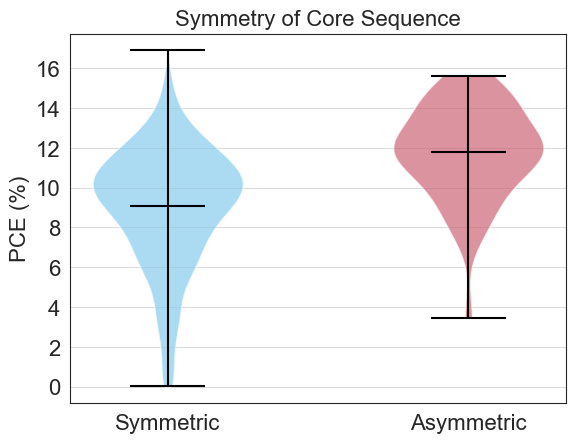

The number of symmetric cores is 969
The number of asymmetric cores is 45
The mean PCE for symmetric cores is 9.07798761609907
The mean PCE for asymmetric cores is 11.779555555555556
The mean PCE difference is 2.701567939456485
               sum_sq      df          F        PR(>F)
sym_type   313.855774     1.0  34.785024  5.014702e-09
Residual  9130.999767  1012.0        NaN           NaN


In [4]:
sym_PCE = []
asym_PCE = []

PCE_list = []
sym_type = []

for x in range(len(df)):
    core_seq = df["core_type"][x]

    PCE_list.append(df["PCE_avg"][x])

    # check if sequence is palindrome
    if core_seq == core_seq[::-1]:
        sym_PCE.append(df["PCE_avg"][x])
        sym_type.append("sym")
    else:
        asym_PCE.append(df["PCE_avg"][x])
        sym_type.append("asym")

plot_violin(sym_PCE, asym_PCE, "Symmetry of Core Sequence", "Symmetric", "Asymmetric", "symmetry_core_seq_violinplot")
print(f"The number of symmetric cores is {len(sym_PCE)}")
print(f"The number of asymmetric cores is {len(asym_PCE)}")
print(f"The mean PCE for symmetric cores is {mean(sym_PCE)}")
print(f"The mean PCE for asymmetric cores is {mean(asym_PCE)}")
print(f"The mean PCE difference is {mean(asym_PCE) - mean(sym_PCE)}")

data = {'PCE': PCE_list, 'Symmetry': sym_type}
data_df = pd.DataFrame(data)

my_model = smf.ols(formula='PCE_list ~ sym_type', data=data_df)
# fit model 
my_model_fit = my_model.fit()

anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

## Number/percentage of each type of ring

In [5]:
num_t = []
perc_t = []
num_p = []
perc_p = []
num_b = []
perc_b = []
num_o = []
perc_o = []
num_n = []
perc_n = []
num_x = []
perc_x = []
num_z = []
perc_z = []
num_w = []
perc_w = []
num_m = []
perc_m = []
PCE = []

for i in range(len(df)):
    core_seq = df["core_type"][i]
    seq_len = len(core_seq)

    t_count = core_seq.count("t")
    num_t.append(t_count)
    perc_t.append(round(t_count/seq_len, 2))

    p_count = core_seq.count("p")
    num_p.append(p_count)
    perc_p.append(round(p_count/seq_len, 2))

    b_count = core_seq.count("b")
    num_b.append(b_count)
    perc_b.append(round(b_count/seq_len, 2))

    o_count = core_seq.count("o")
    num_o.append(o_count)
    perc_o.append(round(o_count/seq_len, 2))

    n_count = core_seq.count("n")
    num_n.append(n_count)
    perc_n.append(round(n_count/seq_len, 2))

    x_count = core_seq.count("x")
    num_x.append(x_count)
    perc_x.append(round(x_count/seq_len, 2))

    z_count = core_seq.count("z")
    num_z.append(z_count)
    perc_z.append(round(z_count/seq_len, 2))

    w_count = core_seq.count("w")
    num_w.append(w_count)
    perc_w.append(round(w_count/seq_len, 2))

    m_count = core_seq.count("m")
    num_m.append(m_count)   
    perc_m.append(round(m_count/seq_len, 2))

    PCE.append(df["PCE_avg"][i])

df["t_count"] = num_t
df["p_count"] = num_p
df["b_count"] = num_b
df["o_count"] = num_o
df["n_count"] = num_n
df["x_count"] = num_x
df["z_count"] = num_z
df["w_count"] = num_w
df["m_count"] = num_m

In [6]:
def ring_type_violinplots(df, count_type, xlabel, figname):
    count_0 = []
    count_1 = []
    count_2 = []
    count_3 = []
    count_4 = []
    count_5 = []
    count_6 = []
    count_7 = []
    count_8 = []

    count = list(df[count_type])
    PCE = list(df["PCE_avg"])

    for x in range(len(count)):
        
        if count[x] == 0:
            count_0.append(PCE[x])
        elif count[x] == 1:
            count_1.append(PCE[x])
        elif count[x] == 2:
            count_2.append(PCE[x])
        elif count[x] == 3:
            count_3.append(PCE[x])
        elif count[x] == 4:
            count_4.append(PCE[x])
        elif count[x] == 5:
            count_5.append(PCE[x])
        elif count[x] == 6:
            count_6.append(PCE[x])
        elif count[x] == 7:
            count_7.append(PCE[x])
        elif count[x] == 8:
            count_8.append(PCE[x])
        else:
            print(num_t[x])


    num_rings = [count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7, count_8]
    new_num_rings = []
    label_counts = []
    label_count = 0
    for i in range(len(num_rings)):
        # needs to have at least 3 samples for a violin plot to be made
        if len(num_rings[i]) >= 3:
            new_num_rings.append(num_rings[i])
            label_counts.append(label_count)
        label_count +=1

        print(f"The number of NFAs with {i} units is {len(num_rings[i])}")
        if len(num_rings[i]) > 1:
            print(f"The average PCE for NFAs with {i} units is {mean(num_rings[i])} ")

    # ANOVA analysis
    # generate model for linear regression
    my_model = smf.ols(formula=f'PCE_avg ~ {count_type}', data=df)

    # fit model 
    my_model_fit = my_model.fit()
    #print(my_model_fit.summary())
    anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
    print(anova_table)

    # plot data
    fig, ax = plt.subplots()
    plt.violinplot(new_num_rings, np.arange(len(new_num_rings)), showmedians = True)

    ax.set_ylabel('PCE (%)')
    ax.set_xlabel(xlabel)

    ax.set_xticks(np.arange(len(new_num_rings)))
    ax.set_xticklabels(label_counts)

    ring_type = figname.split("_")[0]
    if ring_type == "5rings":
        ax.set_title("5 Fused Ring NFAs")
    elif ring_type == "7rings":
        ax.set_title("7 Fused Ring NFAs")

    plt.tight_layout()

    #plt.savefig(f'{figname}_ringcount.pdf', dpi=600)
    plt.savefig(f'{figname}_ringcount.png', dpi=600)
    plt.show()

### Thiophene

The number of NFAs with 0 units is 17
The average PCE for NFAs with 0 units is 8.762941176470589 
The number of NFAs with 1 units is 3
The average PCE for NFAs with 1 units is 12.356666666666667 
The number of NFAs with 2 units is 367
The average PCE for NFAs with 2 units is 8.622288828337874 
The number of NFAs with 3 units is 25
The average PCE for NFAs with 3 units is 12.7328 
The number of NFAs with 4 units is 560
The average PCE for NFAs with 4 units is 9.276625 
The number of NFAs with 5 units is 6
The average PCE for NFAs with 5 units is 11.333333333333334 
The number of NFAs with 6 units is 34
The average PCE for NFAs with 6 units is 11.15 
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 2
The average PCE for NFAs with 8 units is 7.949999999999999 
               sum_sq      df          F    PR(>F)
t_count    157.743427     1.0  17.189019  0.000037
Residual  9287.112114  1012.0        NaN       NaN


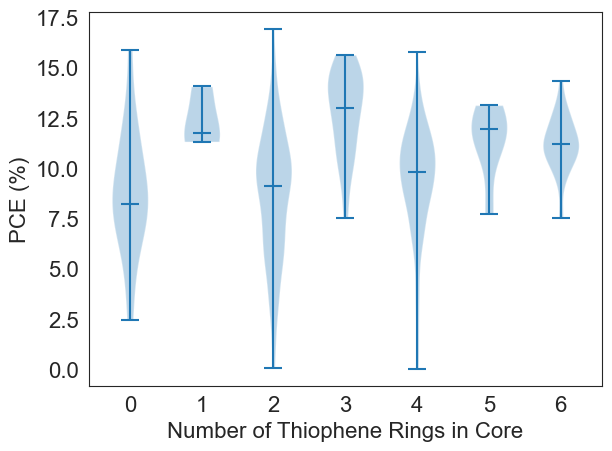

In [7]:
ring_type_violinplots(df, "t_count",'Number of Thiophene Rings in Core', 'thiophene_count')


There looks to be an effect on even/odd number of rings

In [8]:
tukey = pairwise_tukeyhsd(endog=df['PCE_avg'], groups = df["t_count"], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   3.5937 0.5244  -2.0363  9.2237  False
     0      2  -0.1407    1.0  -2.3711  2.0898  False
     0      3   3.9699 0.0006   1.1436  6.7961   True
     0      4   0.5137 0.9969  -1.6997   2.727  False
     0      5   2.5704 0.6005  -1.6988  6.8396  False
     0      6   2.3871 0.1192  -0.2835  5.0576  False
     0      8  -0.8129    1.0  -7.5337  5.9078  False
     1      2  -3.7344  0.367  -8.9462  1.4774  False
     1      3   0.3761    1.0  -5.1171  5.8694  False
     1      4    -3.08  0.622  -8.2846  2.1245  False
     1      5  -1.0233 0.9997  -7.3805  5.3339  False
     1      6  -1.2067 0.9976  -6.6214  4.2081  False
     1      8  -4.4067 0.7315 -12.6138  3.8004  False
     2      3   4.1105    0.0   2.2522  5.9688   True
     2      4   0.6543 0.0229   0.0505  1.2581   True
     2      5    2.711 0.337

Lets look more into the even/odd effect for thiophene rings

Average PCE of odd rings is: 12.45264705882353
Average PCE of even rings is: 9.090643821391486
Average PCE difference is: 3.3620032374320434
                  sum_sq     df          F        PR(>F)
even_or_odd   371.198575    1.0  41.420651  1.905345e-10
Residual     8916.870463  995.0        NaN           NaN


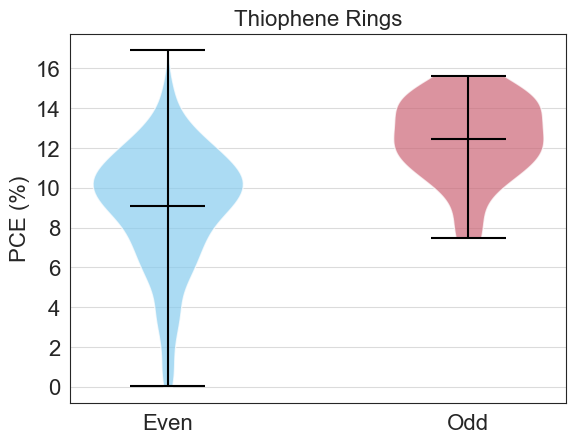

In [9]:
even_or_odd = []
even_PCE = []
odd_PCE = []
total_PCE = []
even_rings = [2, 4, 6, 8]
odd_rings = [1, 3, 5, 7]

count = list(df["t_count"])
PCE = list(df["PCE_avg"])

for x in range(len(count)):
    if count[x] in even_rings:
        even_PCE.append(PCE[x])
        even_or_odd.append("even")
        total_PCE.append(PCE[x])
    elif count[x] in odd_rings:
        odd_PCE.append(PCE[x])
        even_or_odd.append("odd")
        total_PCE.append(PCE[x])

print(f"Average PCE of odd rings is: {np.average(odd_PCE)}")
print(f"Average PCE of even rings is: {np.average(even_PCE)}")
print(f"Average PCE difference is: {np.average(odd_PCE) - np.average(even_PCE)}")

even_odd = {'even_or_odd': even_or_odd, 'PCE': total_PCE}
even_odd_df = pd.DataFrame(even_odd)

my_model = smf.ols(formula=f'PCE ~ even_or_odd', data=even_odd_df)
# fit model 
my_model_fit = my_model.fit()
#print(my_model_fit.summary())
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

plot_violin(even_PCE, odd_PCE, "Thiophene Rings", "Even", "Odd", "thiophene_even_odd_violinplot")


### Cyclopentadiene

The number of NFAs with 0 units is 49
The average PCE for NFAs with 0 units is 9.583469387755102 
The number of NFAs with 1 units is 12
The average PCE for NFAs with 1 units is 13.1425 
The number of NFAs with 2 units is 902
The average PCE for NFAs with 2 units is 9.075953436807096 
The number of NFAs with 3 units is 33
The average PCE for NFAs with 3 units is 10.366666666666667 
The number of NFAs with 4 units is 18
The average PCE for NFAs with 4 units is 9.485555555555555 
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq      df         F    PR(>F)
p_count      4.208289     1.0  0.451112  0.501961
Residual  9440.647252  1012.0       NaN       NaN


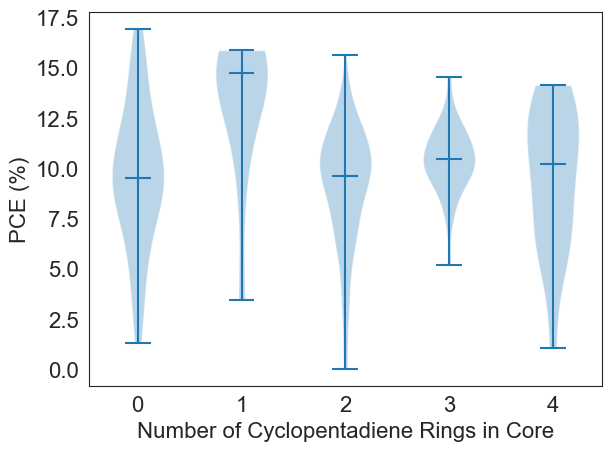

In [10]:
ring_type_violinplots(df, "p_count", 'Number of Cyclopentadiene Rings in Core', 'pentane_count')


### Benzene

The number of NFAs with 0 units is 45
The average PCE for NFAs with 0 units is 10.451777777777778 
The number of NFAs with 1 units is 850
The average PCE for NFAs with 1 units is 8.986035294117647 
The number of NFAs with 2 units is 109
The average PCE for NFAs with 2 units is 10.480642201834863 
The number of NFAs with 3 units is 10
The average PCE for NFAs with 3 units is 7.58 
The number of NFAs with 4 units is 0
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq      df         F    PR(>F)
b_count     13.926799     1.0  1.494436  0.221814
Residual  9430.928742  1012.0       NaN       NaN


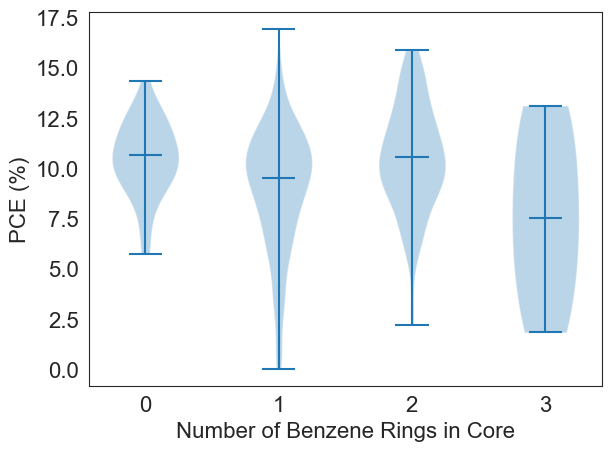

In [11]:
ring_type_violinplots(df, "b_count", 'Number of Benzene Rings in Core', 'benzene_count')

### Pyran

The number of NFAs with 0 units is 993
The average PCE for NFAs with 0 units is 9.150090634441087 
The number of NFAs with 1 units is 0
The number of NFAs with 2 units is 21
The average PCE for NFAs with 2 units is 11.457619047619048 
The number of NFAs with 3 units is 0
The number of NFAs with 4 units is 0
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq      df          F    PR(>F)
o_count    109.502669     1.0  11.870649  0.000594
Residual  9335.352873  1012.0        NaN       NaN


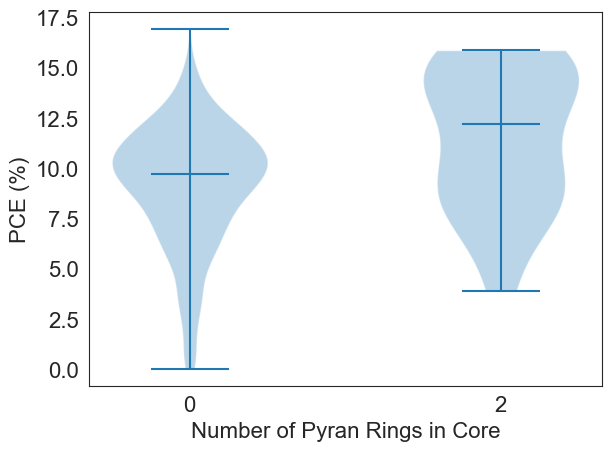

In [12]:
ring_type_violinplots(df, "o_count", 'Number of Pyran Rings in Core', 'pyran_count')

### Pyrrole

The number of NFAs with 0 units is 928
The average PCE for NFAs with 0 units is 9.049288793103448 
The number of NFAs with 1 units is 49
The average PCE for NFAs with 1 units is 11.520408163265307 
The number of NFAs with 2 units is 37
The average PCE for NFAs with 2 units is 9.848918918918919 
The number of NFAs with 3 units is 0
The number of NFAs with 4 units is 0
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq      df          F   PR(>F)
n_count    144.100375     1.0  15.679327  0.00008
Residual  9300.755167  1012.0        NaN      NaN


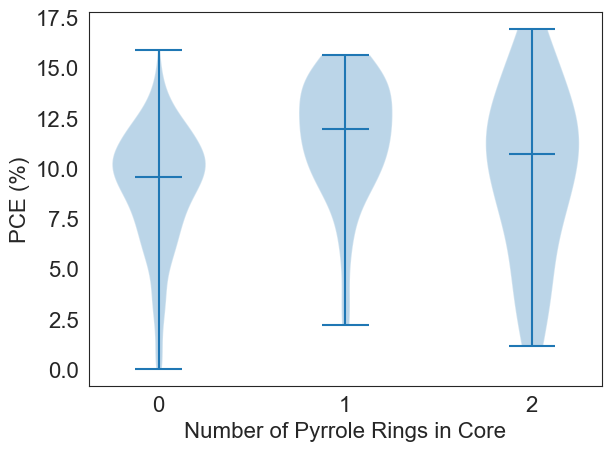

In [13]:
ring_type_violinplots(df, "n_count", 'Number of Pyrrole Rings in Core', 'pyrrole_count')

In [14]:
tukey = pairwise_tukeyhsd(endog=df['PCE_avg'], groups = df["n_count"], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   2.4711    0.0  1.4364  3.5058   True
     0      2   0.7996 0.2521 -0.3838   1.983  False
     1      2  -1.6715 0.0292 -3.2089 -0.1341   True
----------------------------------------------------


### Furan

The number of NFAs with 0 units is 1008
The average PCE for NFAs with 0 units is 9.20435515873016 
The number of NFAs with 1 units is 1
The number of NFAs with 2 units is 5
The average PCE for NFAs with 2 units is 7.552 
The number of NFAs with 3 units is 0
The number of NFAs with 4 units is 0
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq      df         F   PR(>F)
x_count     10.428760     1.0  1.118659  0.29046
Residual  9434.426781  1012.0       NaN      NaN


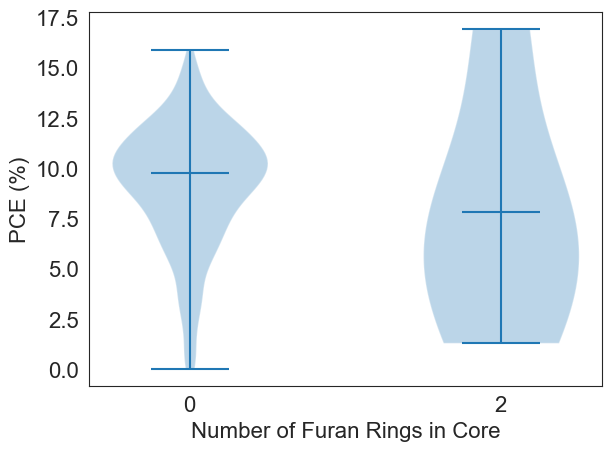

In [15]:
ring_type_violinplots(df, "x_count", 'Number of Furan Rings in Core', 'furan_count')

### Silole

The number of NFAs with 0 units is 1004
The average PCE for NFAs with 0 units is 9.201304780876495 
The number of NFAs with 1 units is 0
The number of NFAs with 2 units is 10
The average PCE for NFAs with 2 units is 8.854 
The number of NFAs with 3 units is 0
The number of NFAs with 4 units is 0
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq      df         F    PR(>F)
z_count      1.194311     1.0  0.127985  0.720606
Residual  9443.661231  1012.0       NaN       NaN


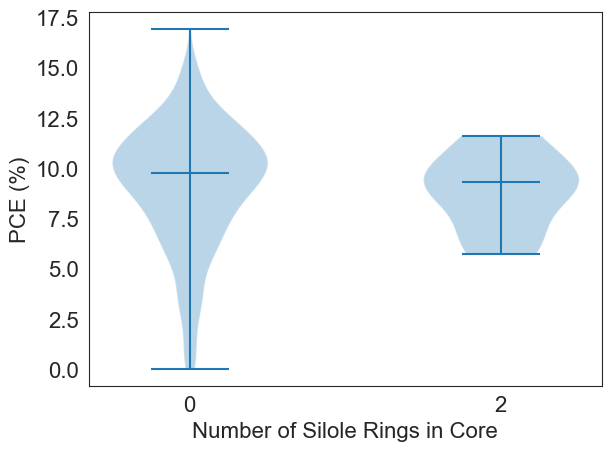

In [16]:
ring_type_violinplots(df, "z_count", 'Number of Silole Rings in Core', 'silole_count')

### Selenophene

The number of NFAs with 0 units is 997
The average PCE for NFAs with 0 units is 9.162066198595788 
The number of NFAs with 1 units is 0
The number of NFAs with 2 units is 17
The average PCE for NFAs with 2 units is 11.298235294117648 
The number of NFAs with 3 units is 0
The number of NFAs with 4 units is 0
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq      df         F    PR(>F)
m_count     76.274151     1.0  8.239181  0.004185
Residual  9368.581391  1012.0       NaN       NaN


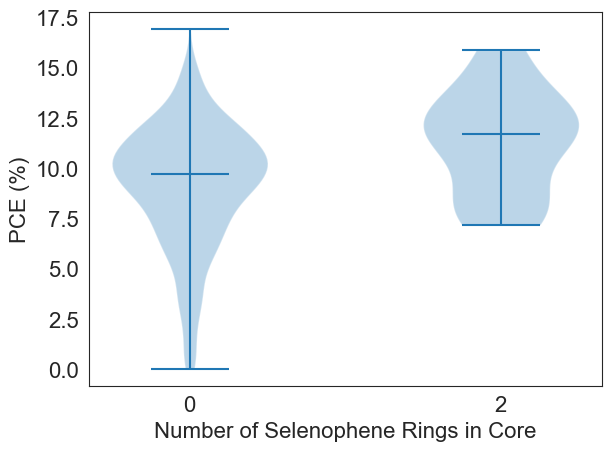

In [17]:
ring_type_violinplots(df, "m_count", 'Number of Selenophene Rings in Core', 'selenophene_count')

## Check same thing but for Fused NFAs with only 5 or 7 rings

In [18]:
five_rings = df[df["core_length"]==5]
seven_rings = df[df["core_length"]==7]

The number of NFAs with 0 units is 10
The average PCE for NFAs with 0 units is 8.027 
The number of NFAs with 1 units is 3
The average PCE for NFAs with 1 units is 12.356666666666667 
The number of NFAs with 2 units is 283
The average PCE for NFAs with 2 units is 8.054098939929329 
The number of NFAs with 3 units is 0
The number of NFAs with 4 units is 3
The average PCE for NFAs with 4 units is 10.120000000000001 
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq     df         F   PR(>F)
t_count      0.022415    1.0  0.002459  0.96048
Residual  2706.822153  297.0       NaN      NaN


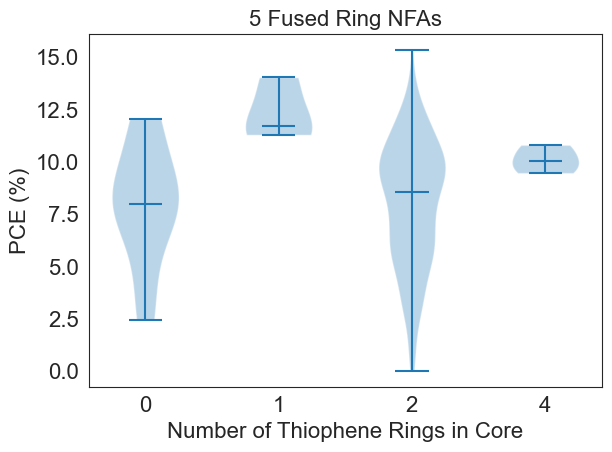

The number of NFAs with 0 units is 1
The number of NFAs with 1 units is 0
The number of NFAs with 2 units is 60
The average PCE for NFAs with 2 units is 10.9275 
The number of NFAs with 3 units is 17
The average PCE for NFAs with 3 units is 13.83529411764706 
The number of NFAs with 4 units is 481
The average PCE for NFAs with 4 units is 9.216112266112265 
The number of NFAs with 5 units is 1
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq     df          F        PR(>F)
t_count    279.780314    1.0  31.389465  3.319571e-08
Residual  4973.560955  558.0        NaN           NaN


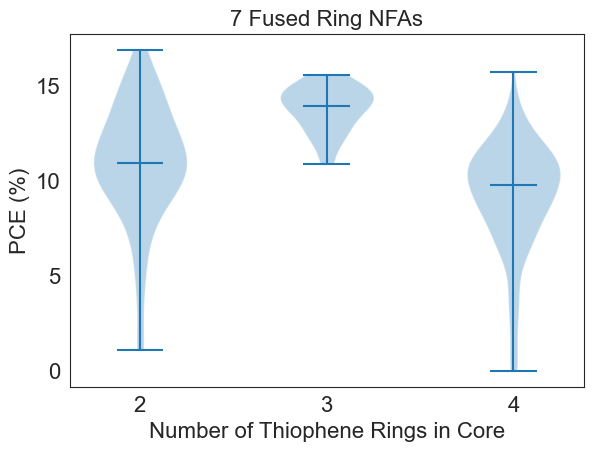

In [19]:
ring_type_violinplots(five_rings, "t_count", 'Number of Thiophene Rings in Core', '5rings_thiophene_count')
ring_type_violinplots(seven_rings, "t_count", 'Number of Thiophene Rings in Core', '7rings_thiophene_count')

In [20]:
tukey = pairwise_tukeyhsd(endog=seven_rings['PCE_avg'], groups = seven_rings["t_count"], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      2  -4.9225 0.4511 -12.9709  3.1259  False
     0      3  -2.0147 0.9625 -10.2283  6.1989  False
     0      4  -6.6339 0.1555 -14.6244  1.3566  False
     0      5    -2.73 0.9644 -14.0185  8.5585  False
     2      3   2.9078 0.0029   0.7147  5.1009   True
     2      4  -1.7114 0.0002  -2.8043 -0.6185   True
     2      5   2.1925 0.9456  -5.8559 10.2409  False
     3      4  -4.6192    0.0  -6.5891 -2.6493   True
     3      5  -0.7153 0.9993  -8.9289  7.4983  False
     4      5   3.9039 0.6681  -4.0866 11.8944  False
-----------------------------------------------------


The number of NFAs with 0 units is 13
The average PCE for NFAs with 0 units is 7.9 
The number of NFAs with 1 units is 1
The number of NFAs with 2 units is 285
The average PCE for NFAs with 2 units is 8.143438596491228 
The number of NFAs with 3 units is 0
The number of NFAs with 4 units is 0
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq     df         F   PR(>F)
p_count      2.111049    1.0  0.231809  0.63054
Residual  2704.733519  297.0       NaN      NaN


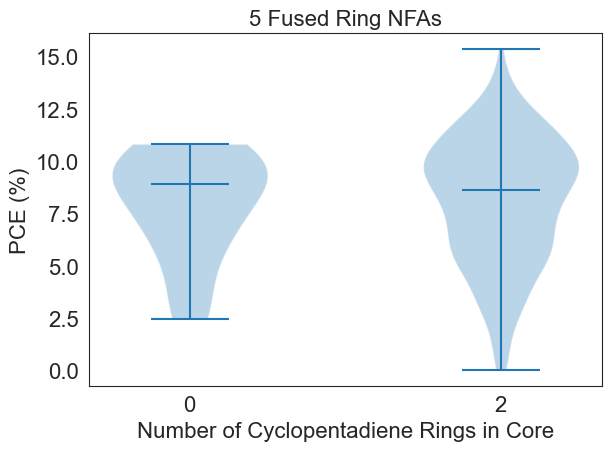

The number of NFAs with 0 units is 20
The average PCE for NFAs with 0 units is 10.042 
The number of NFAs with 1 units is 10
The average PCE for NFAs with 1 units is 14.198 
The number of NFAs with 2 units is 509
The average PCE for NFAs with 2 units is 9.410687622789784 
The number of NFAs with 3 units is 21
The average PCE for NFAs with 3 units is 10.471904761904762 
The number of NFAs with 4 units is 0
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq     df         F    PR(>F)
p_count     19.791922    1.0  2.110211  0.146881
Residual  5233.549348  558.0       NaN       NaN


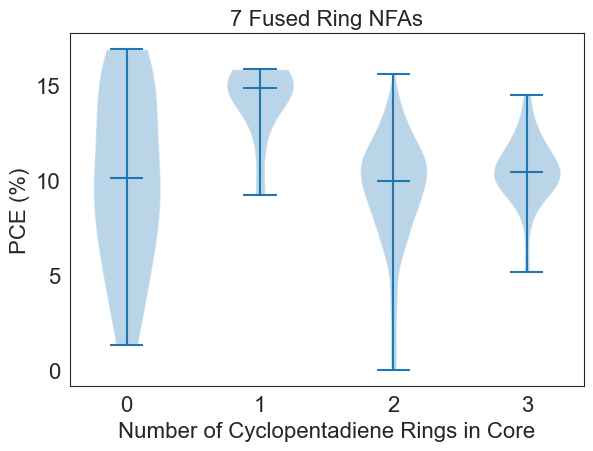

In [21]:
ring_type_violinplots(five_rings, "p_count", 'Number of Cyclopentadiene Rings in Core', '5rings_pentane_count')
ring_type_violinplots(seven_rings, "p_count", 'Number of Cyclopentadiene Rings in Core', '7rings_pentane_count')

The number of NFAs with 0 units is 3
The average PCE for NFAs with 0 units is 10.120000000000001 
The number of NFAs with 1 units is 289
The average PCE for NFAs with 1 units is 8.079584775086506 
The number of NFAs with 2 units is 3
The average PCE for NFAs with 2 units is 12.356666666666667 
The number of NFAs with 3 units is 4
The average PCE for NFAs with 3 units is 6.145 
The number of NFAs with 4 units is 0
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq     df         F    PR(>F)
b_count      3.773324    1.0  0.414594  0.520144
Residual  2703.071245  297.0       NaN       NaN


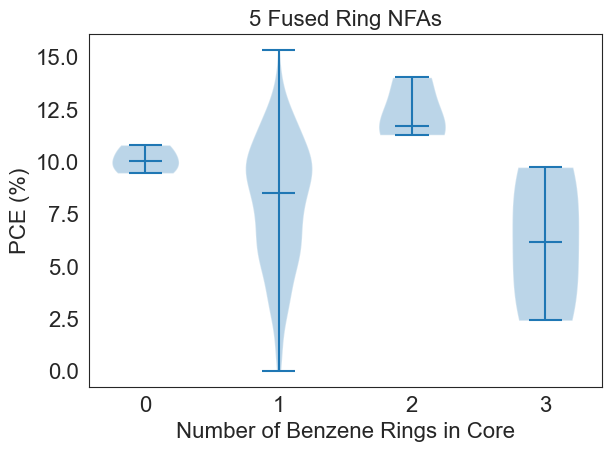

The number of NFAs with 0 units is 1
The number of NFAs with 1 units is 516
The average PCE for NFAs with 1 units is 9.401647286821705 
The number of NFAs with 2 units is 41
The average PCE for NFAs with 2 units is 11.33219512195122 
The number of NFAs with 3 units is 2
The average PCE for NFAs with 3 units is 11.89 
The number of NFAs with 4 units is 0
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq     df          F    PR(>F)
b_count    132.349607    1.0  14.421246  0.000162
Residual  5120.991663  558.0        NaN       NaN


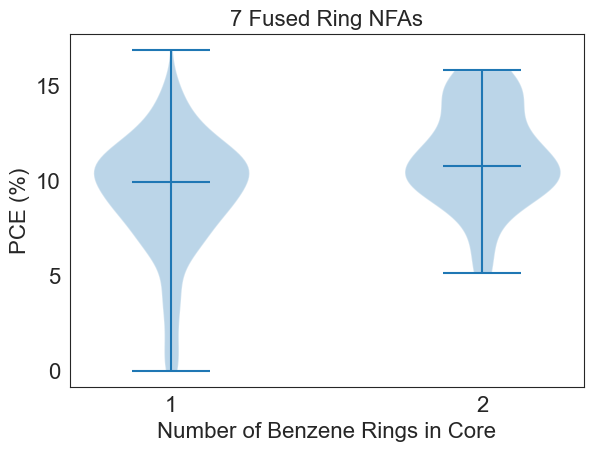

In [22]:
ring_type_violinplots(five_rings, "b_count", 'Number of Benzene Rings in Core', '5rings_benzene_count')
ring_type_violinplots(seven_rings, "b_count", 'Number of Benzene Rings in Core', '7rings_benzene_count')

The number of NFAs with 0 units is 294
The average PCE for NFAs with 0 units is 8.132006802721088 
The number of NFAs with 1 units is 0
The number of NFAs with 2 units is 5
The average PCE for NFAs with 2 units is 7.24 
The number of NFAs with 3 units is 0
The number of NFAs with 4 units is 0
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq     df         F    PR(>F)
o_count      3.911853    1.0  0.429837  0.512577
Residual  2702.932716  297.0       NaN       NaN


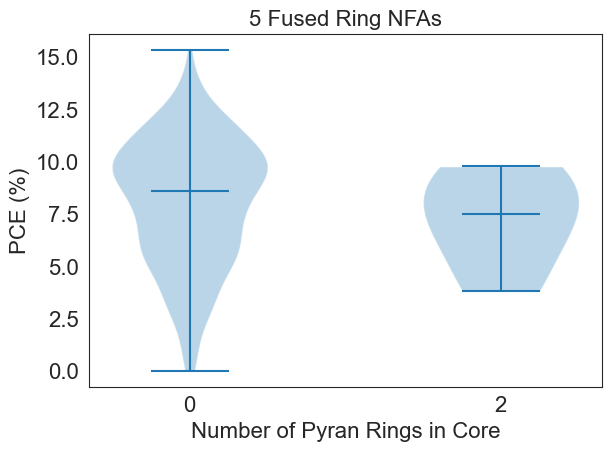

The number of NFAs with 0 units is 550
The average PCE for NFAs with 0 units is 9.474163636363636 
The number of NFAs with 1 units is 0
The number of NFAs with 2 units is 10
The average PCE for NFAs with 2 units is 14.198 
The number of NFAs with 3 units is 0
The number of NFAs with 4 units is 0
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq     df          F    PR(>F)
o_count    219.161545    1.0  24.292367  0.000001
Residual  5034.179725  558.0        NaN       NaN


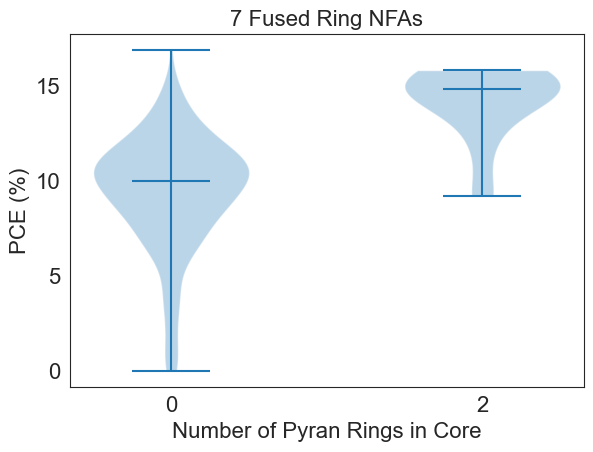

In [23]:
ring_type_violinplots(five_rings, "o_count", 'Number of Pyran Rings in Core', '5rings_pyran_count')
ring_type_violinplots(seven_rings, "o_count", 'Number of Pyran Rings in Core', '7rings_pyran_count')

The number of NFAs with 0 units is 293
The average PCE for NFAs with 0 units is 8.107781569965871 
The number of NFAs with 1 units is 4
The average PCE for NFAs with 1 units is 8.4475 
The number of NFAs with 2 units is 2
The average PCE for NFAs with 2 units is 8.82 
The number of NFAs with 3 units is 0
The number of NFAs with 4 units is 0
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq     df         F    PR(>F)
n_count      1.449521    1.0  0.159129  0.690246
Residual  2705.395048  297.0       NaN       NaN


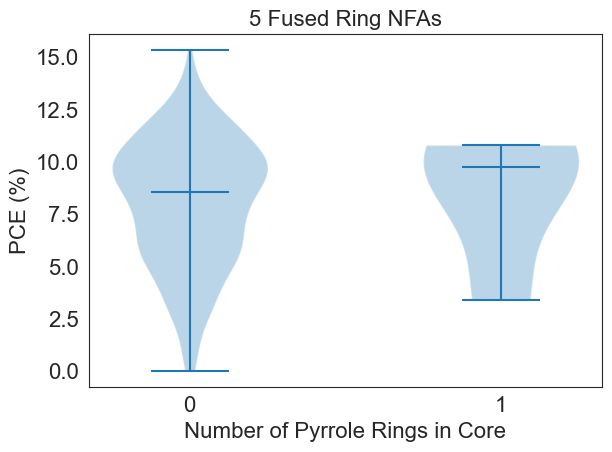

The number of NFAs with 0 units is 513
The average PCE for NFAs with 0 units is 9.391890838206628 
The number of NFAs with 1 units is 26
The average PCE for NFAs with 1 units is 12.578076923076923 
The number of NFAs with 2 units is 21
The average PCE for NFAs with 2 units is 9.89047619047619 
The number of NFAs with 3 units is 0
The number of NFAs with 4 units is 0
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
              sum_sq     df         F    PR(>F)
n_count     84.00735    1.0  9.068112  0.002719
Residual  5169.33392  558.0       NaN       NaN


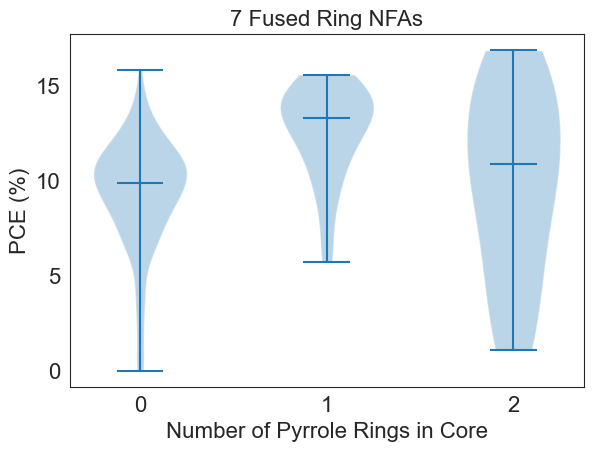

In [24]:
ring_type_violinplots(five_rings, "n_count", 'Number of Pyrrole Rings in Core', '5rings_pyrrole_count')
ring_type_violinplots(seven_rings, "n_count", 'Number of Pyrrole Rings in Core', '7rings_pyrrole_count')

In [25]:
tukey = pairwise_tukeyhsd(endog=seven_rings['PCE_avg'], groups = seven_rings["n_count"], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   3.1862    0.0  1.7708  4.6015   True
     0      2   0.4986 0.7353 -1.0689  2.0661  False
     1      2  -2.6876 0.0066 -4.7533 -0.6219   True
----------------------------------------------------


The number of NFAs with 0 units is 297
The average PCE for NFAs with 0 units is 8.11919191919192 
The number of NFAs with 1 units is 0
The number of NFAs with 2 units is 2
The average PCE for NFAs with 2 units is 7.805 
The number of NFAs with 3 units is 0
The number of NFAs with 4 units is 0
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq     df         F    PR(>F)
x_count      0.196113    1.0  0.021519  0.883472
Residual  2706.648456  297.0       NaN       NaN


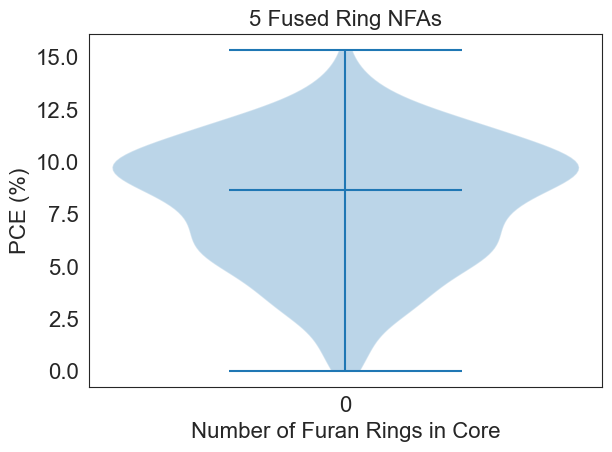

The number of NFAs with 0 units is 556
The average PCE for NFAs with 0 units is 9.567841726618704 
The number of NFAs with 1 units is 1
The number of NFAs with 2 units is 3
The average PCE for NFAs with 2 units is 7.383333333333333 
The number of NFAs with 3 units is 0
The number of NFAs with 4 units is 0
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq     df         F    PR(>F)
x_count     10.618805    1.0  1.130194  0.288194
Residual  5242.722465  558.0       NaN       NaN


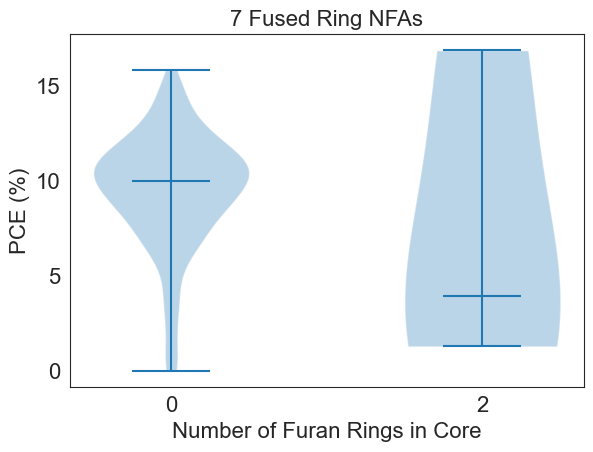

In [26]:
ring_type_violinplots(five_rings, "x_count", 'Number of Furan Rings in Core', '5rings_furan_count')
ring_type_violinplots(seven_rings, "x_count", 'Number of Furan Rings in Core', '7rings_furan_count')

The number of NFAs with 0 units is 297
The average PCE for NFAs with 0 units is 8.117676767676768 
The number of NFAs with 1 units is 0
The number of NFAs with 2 units is 2
The average PCE for NFAs with 2 units is 8.03 
The number of NFAs with 3 units is 0
The number of NFAs with 4 units is 0
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq     df         F    PR(>F)
z_count      0.015272    1.0  0.001676  0.967376
Residual  2706.829297  297.0       NaN       NaN


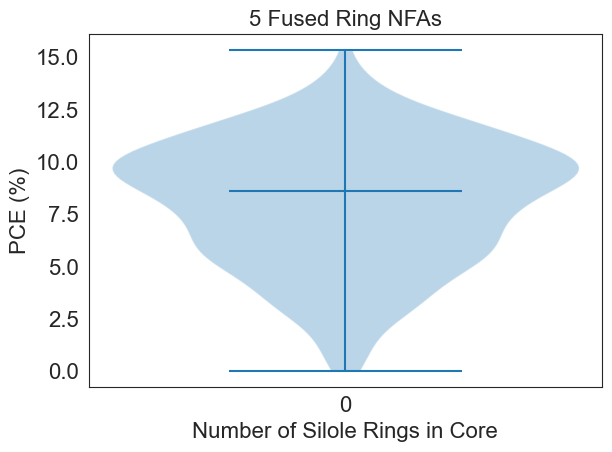

The number of NFAs with 0 units is 557
The average PCE for NFAs with 0 units is 9.563698384201077 
The number of NFAs with 1 units is 0
The number of NFAs with 2 units is 3
The average PCE for NFAs with 2 units is 8.596666666666668 
The number of NFAs with 3 units is 0
The number of NFAs with 4 units is 0
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq     df         F   PR(>F)
z_count      2.790422    1.0  0.296551  0.58627
Residual  5250.550848  558.0       NaN      NaN


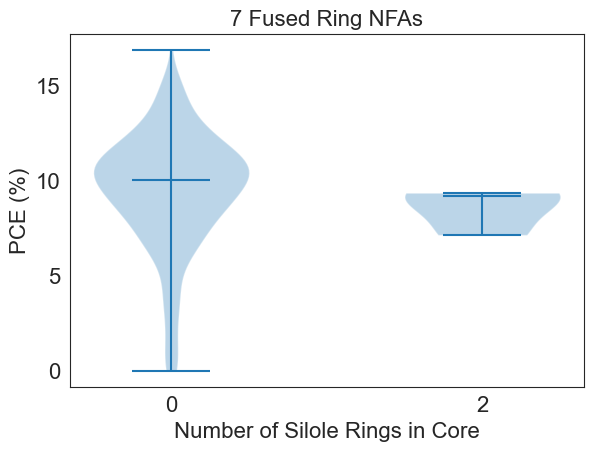

In [27]:
ring_type_violinplots(five_rings, "z_count", 'Number of Silole Rings in Core', '5rings_Silole_count')
ring_type_violinplots(seven_rings, "z_count", 'Number of Silole Rings in Core', '7rings_Silole_count')

The number of NFAs with 0 units is 295
The average PCE for NFAs with 0 units is 8.09128813559322 
The number of NFAs with 1 units is 0
The number of NFAs with 2 units is 4
The average PCE for NFAs with 2 units is 10.02 
The number of NFAs with 3 units is 0
The number of NFAs with 4 units is 0
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq     df         F    PR(>F)
m_count     14.680658    1.0  1.619573  0.204147
Residual  2692.163911  297.0       NaN       NaN


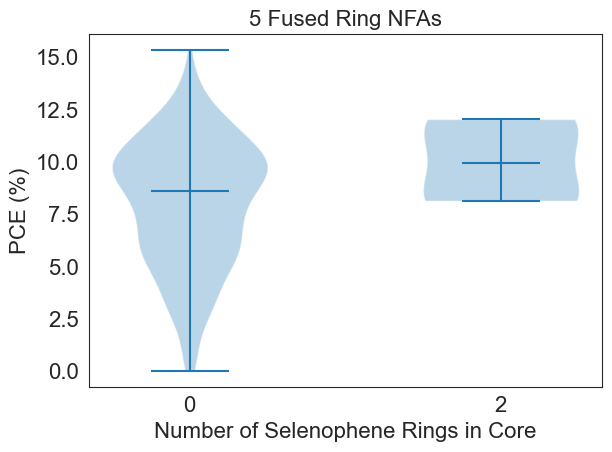

The number of NFAs with 0 units is 548
The average PCE for NFAs with 0 units is 9.504781021897811 
The number of NFAs with 1 units is 0
The number of NFAs with 2 units is 12
The average PCE for NFAs with 2 units is 12.0125 
The number of NFAs with 3 units is 0
The number of NFAs with 4 units is 0
The number of NFAs with 5 units is 0
The number of NFAs with 6 units is 0
The number of NFAs with 7 units is 0
The number of NFAs with 8 units is 0
               sum_sq     df         F    PR(>F)
m_count     73.846771    1.0  7.955699  0.004964
Residual  5179.494499  558.0       NaN       NaN


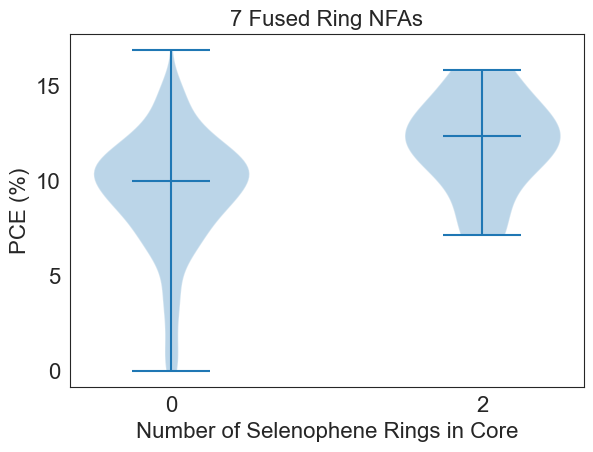

In [28]:
ring_type_violinplots(five_rings, "m_count", 'Number of Selenophene Rings in Core', '5rings_Selenophene_count')
ring_type_violinplots(seven_rings, "m_count", 'Number of Selenophene Rings in Core', '7rings_Selenophene_count')

# Most common core sequences

In [29]:
seq_counts = df["core_type"].value_counts()
five_ring_seq_counts = []
five_ring_seq = []
seven_ring_seq_counts = []
seven_ring_seq = []

for x in range(len(seq_counts)):
    seq = seq_counts.index[x]
    if len(seq) == 7:
        seven_ring_seq_counts.append(seq_counts[x])
        seven_ring_seq.append(seq)
    elif len(seq) == 5:
        five_ring_seq_counts.append(seq_counts[x])
        five_ring_seq.append(seq)

all_seq_df = pd.DataFrame({'seq': seq_counts.index, 'count': seq_counts})
five_ring_seq_df = pd.DataFrame({'seq': five_ring_seq, 'count': five_ring_seq_counts})
seven_ring_seq_df = pd.DataFrame({'seq': seven_ring_seq, 'count': seven_ring_seq_counts})

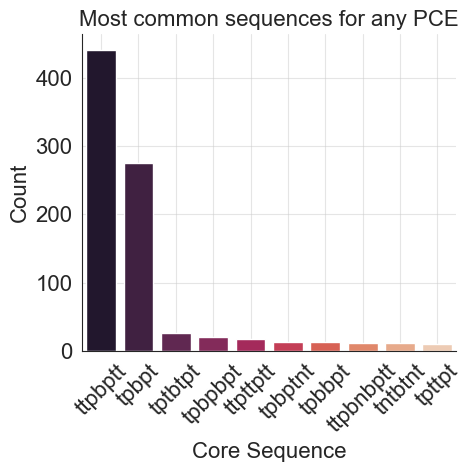

In [30]:
top_seq = all_seq_df[:10]
sns.catplot(data = top_seq, x = "seq", y="count", kind="bar", palette="rocket")

plt.xlabel("Core Sequence")
plt.ylabel("Count")

plt.grid(alpha=0.5)
plt.xticks(rotation=45, ha='center')

plt.title("Most common sequences for any PCE")

plt.tight_layout()

#plt.savefig('common_fused_seq_barplot.pdf', dpi=600)
plt.savefig('common_fused_seq_barplot.png', dpi=600)

plt.show()

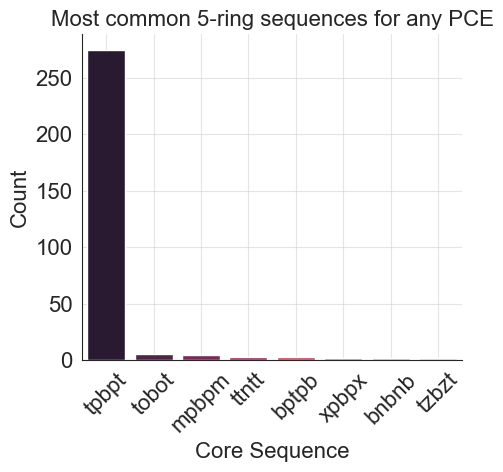

In [31]:
top_seq_five_rings = five_ring_seq_df[:8]
sns.catplot(data = top_seq_five_rings, x = "seq", y="count", kind="bar", palette="rocket")

plt.xlabel("Core Sequence")
plt.ylabel("Count")

plt.grid(alpha=0.5)
plt.xticks(rotation=45)

plt.title("Most common 5-ring sequences for any PCE")

plt.tight_layout()

#plt.savefig('common_fused_seq_5rings_barplot.pdf', dpi=600)
plt.savefig('common_fused_seq_5rings_barplot.png', dpi=600)

plt.show()

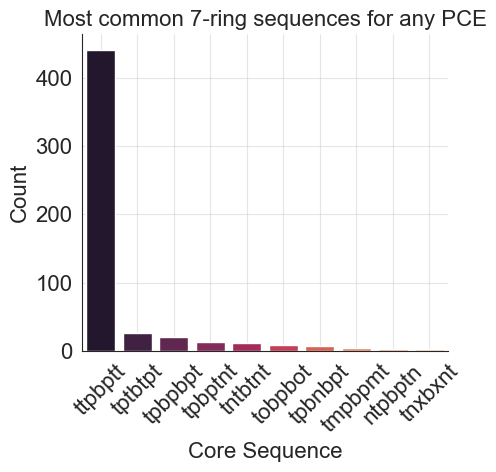

In [32]:
top_seq_seven_rings = seven_ring_seq_df[:10]
sns.catplot(data = top_seq_seven_rings, x = "seq", y="count", kind="bar", palette="rocket")

plt.xlabel("Core Sequence")
plt.ylabel("Count")

plt.grid(alpha=0.5)
plt.xticks(rotation=45)

plt.title("Most common 7-ring sequences for any PCE")

plt.tight_layout()

#plt.savefig('common_fused_seq_7rings_barplot.pdf', dpi=600)
plt.savefig('common_fused_seq_7rings_barplot.png', dpi=600)

plt.show()

# Top core sequences for those with PCE above 10%

In [33]:
PCE_above10 = df[df["PCE_avg"] > 10]

seq_counts_above10 = PCE_above10["core_type"].value_counts()
five_ring_seq_counts_above10 = []
five_ring_seq_above10 = []
seven_ring_seq_counts_above10 = []
seven_ring_seq_above10 = []

for x in range(len(seq_counts_above10)):
    seq = seq_counts_above10.index[x]
    if len(seq) == 7:
        seven_ring_seq_counts_above10.append(seq_counts_above10[x])
        seven_ring_seq_above10.append(seq)
    elif len(seq) == 5:
        five_ring_seq_counts_above10.append(seq_counts_above10[x])
        five_ring_seq_above10.append(seq)

all_seq_df_above10 = pd.DataFrame({'seq': seq_counts_above10.index, 'count': seq_counts_above10})
five_ring_seq_df_above10 = pd.DataFrame({'seq': five_ring_seq_above10, 'count': five_ring_seq_counts_above10})
seven_ring_seq_df_above10 = pd.DataFrame({'seq': seven_ring_seq_above10, 'count': seven_ring_seq_counts_above10})

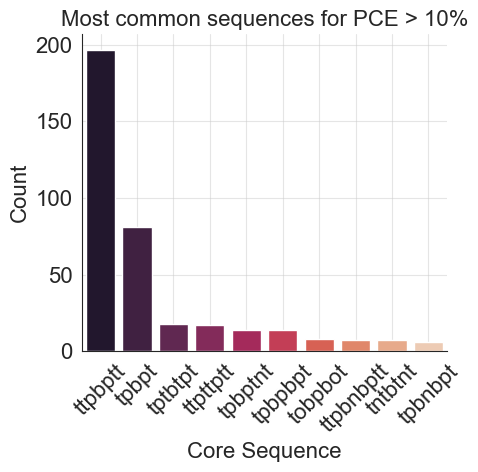

In [34]:
top_seq = all_seq_df_above10[:10]
sns.catplot(data = top_seq, x = "seq", y="count", kind="bar", palette="rocket")

#plt.xticks(np.arange(min(lengths)-1/2, max(lengths)+1/2, 1))
plt.xlabel("Core Sequence")
plt.ylabel("Count")

plt.grid(alpha=0.5)
plt.xticks(rotation=45)

plt.title("Most common sequences for PCE > 10%")

plt.tight_layout()

#plt.savefig('top_PCEabove10_fused_seq_barplot.pdf', dpi=600)
plt.savefig('top_PCEabove10_fused_seq_barplot.png', dpi=600)

plt.show()

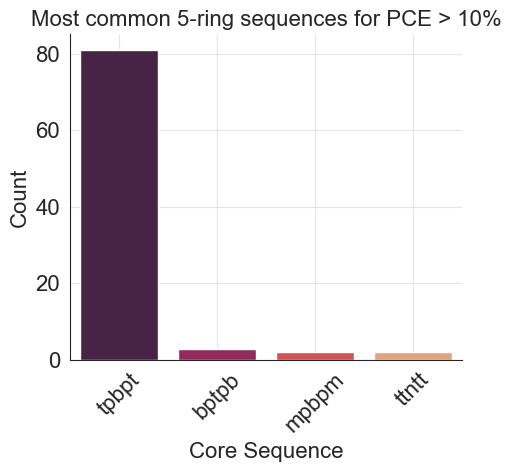

In [35]:
top_seq_five_rings = five_ring_seq_df_above10[:8]
sns.catplot(data = top_seq_five_rings, x = "seq", y="count", kind="bar", palette="rocket")

plt.xlabel("Core Sequence")
plt.ylabel("Count")

plt.grid(alpha=0.5)
plt.xticks(rotation=45)

plt.title("Most common 5-ring sequences for PCE > 10%")

plt.tight_layout()

#plt.savefig('top_PCEabove10_fused_seq_5rings_barplot.pdf', dpi=600)
plt.savefig('top_PCEabove10_fused_seq_5rings_barplot.png', dpi=600)

plt.show()

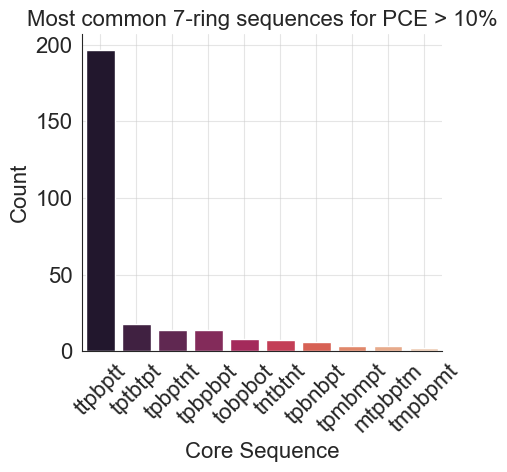

In [36]:
top_seq_seven_rings = seven_ring_seq_df_above10[:10]
sns.catplot(data = top_seq_seven_rings, x = "seq", y="count", kind="bar", palette="rocket")

plt.xlabel("Core Sequence")
plt.ylabel("Count")

plt.grid(alpha=0.5)
plt.xticks(rotation=45)

plt.title("Most common 7-ring sequences for PCE > 10%")

plt.tight_layout()

#plt.savefig('top_PCEabove10_fused_seq_7rings_barplot.pdf', dpi=600)
plt.savefig('top_PCEabove10_fused_seq_7rings_barplot.png', dpi=600)

plt.show()

In [37]:
PCE_above10 = df[df["PCE_avg"] > 10]
PCE_above12 = df[df["PCE_avg"] > 12]
PCE_above14 = df[df["PCE_avg"] > 14]
PCE_above15 = df[df["PCE_avg"] > 15]

print(f"There are {len(df)} fused NFA pairs with any PCE")
print(f"There are {len(PCE_above10)} fused NFA pairs with PCE above 10")
print(f"There are {len(PCE_above12)} fused NFA pairs with PCE above 12")
print(f"There are {len(PCE_above14)} fused NFA pairs with PCE above 14")
print(f"There are {len(PCE_above15)} fused NFA pairs with PCE above 15")

There are 1014 fused NFA pairs with any PCE
There are 453 fused NFA pairs with PCE above 10
There are 156 fused NFA pairs with PCE above 12
There are 32 fused NFA pairs with PCE above 14
There are 11 fused NFA pairs with PCE above 15


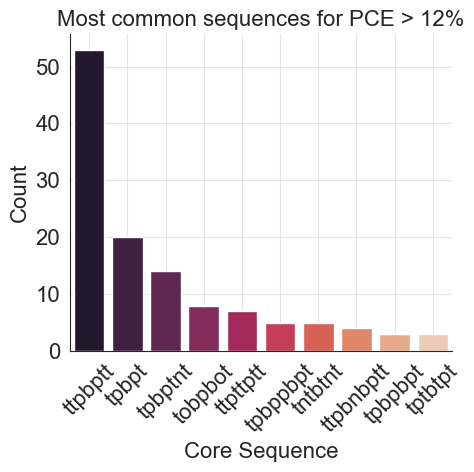

In [38]:
seq_counts_above12 = PCE_above12["core_type"].value_counts()
all_seq_df_above12 = pd.DataFrame({'seq': seq_counts_above12.index, 'count': seq_counts_above12})

top_seq = all_seq_df_above12[:10]
sns.catplot(data = top_seq, x = "seq", y="count", kind="bar", palette="rocket")

#plt.xticks(np.arange(min(lengths)-1/2, max(lengths)+1/2, 1))
plt.xlabel("Core Sequence")
plt.ylabel("Count")

plt.grid(alpha=0.5)
plt.xticks(rotation=45)

plt.title("Most common sequences for PCE > 12%")

plt.tight_layout()

#plt.savefig('top_PCEabove12_fused_seq_barplot.pdf', dpi=600)
plt.savefig('top_PCEabove12_fused_seq_barplot.png', dpi=600)

plt.show()

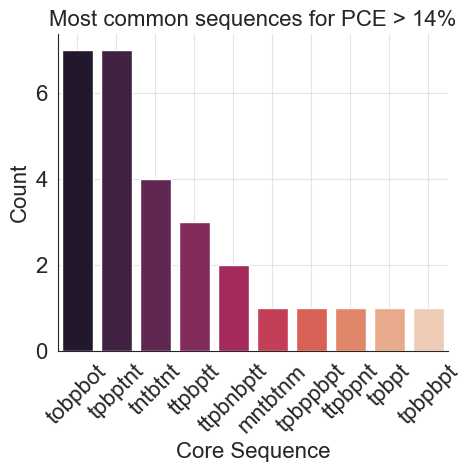

In [39]:
seq_counts_above14 = PCE_above14["core_type"].value_counts()
all_seq_df_above14 = pd.DataFrame({'seq': seq_counts_above14.index, 'count': seq_counts_above14})

top_seq = all_seq_df_above14[:10]
sns.catplot(data = top_seq, x = "seq", y="count", kind="bar", palette="rocket")

plt.xlabel("Core Sequence")
plt.ylabel("Count")

plt.grid(alpha=0.5)
plt.xticks(rotation=45)

plt.title("Most common sequences for PCE > 14%")

plt.tight_layout()

#plt.savefig('top_PCEabove14_fused_seq_barplot.pdf', dpi=600)
plt.savefig('top_PCEabove14_fused_seq_barplot.png', dpi=600)

plt.show()

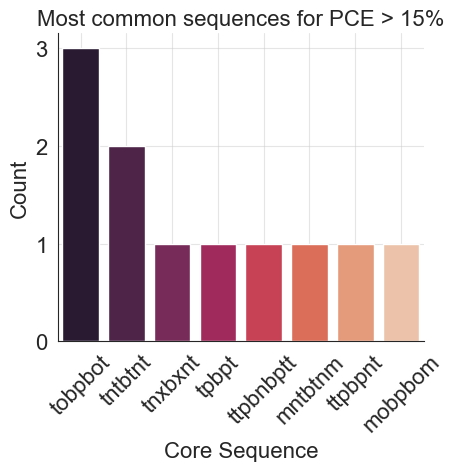

In [40]:
seq_counts_above15 = PCE_above15["core_type"].value_counts()
all_seq_df_above15 = pd.DataFrame({'seq': seq_counts_above15.index, 'count': seq_counts_above15})

top_seq = all_seq_df_above15[:10]
sns.catplot(data = top_seq, x = "seq", y="count", kind="bar", palette="rocket")

plt.xlabel("Core Sequence")
plt.ylabel("Count")

plt.grid(alpha=0.5)
plt.xticks(rotation=45)

plt.title("Most common sequences for PCE > 15%")

plt.tight_layout()

#plt.savefig('top_PCEabove15_fused_seq_barplot.pdf', dpi=600)
plt.savefig('top_PCEabove15_fused_seq_barplot.png', dpi=600)

plt.show()